## nfl lines machine learning project


source data for historical spreads and game scores
http://www.repole.com/sun4cast/data.html

In [7]:
import os

MLNFL_ROOT_DIR = os.environ['MLNFL_ROOT']
print(MLNFL_ROOT_DIR)
codeDir = "".join([MLNFL_ROOT_DIR, os.path.sep])

dataRoot = "".join([codeDir, "data", os.path.sep])

#dataRoot = "/Users/amitbhattacharyya/repos/mlnfl/nfl/data/"

os.chdir(codeDir)

/Users/amitbhattacharyya/repos/mlnfl/nfl


In [8]:
# warnings control
import warnings
# choose default, ignore, always
warnings.filterwarnings('default')


In [12]:
# import necessary modules
%matplotlib inline

from __future__ import division
from __future__ import print_function
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import madden

from sklearn import linear_model
from sklearn import svm
from sklearn import ensemble

print ("pandas version ",pd.__version__)

pandas version  0.22.0


/Users/amitbhattacharyya/.virtualenvs/datascience3/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


In [13]:
# location of lookup files
from referencedata import ReferenceData
lookupFiles = { 'teams' : {'file': 'nflTeams.csv' },
                'seasons' : {'file': 'seasons.csv' },
               }

lookupDir = "".join([dataRoot, 'lookup', os.path.sep])

print ("lookupFiles = %s" % lookupFiles)
print ("lookupDir = %s" % lookupDir)

lookupFiles = {'teams': {'file': 'nflTeams.csv'}, 'seasons': {'file': 'seasons.csv'}}
lookupDir = /Users/amitbhattacharyya/repos/mlnfl/nfl/data/lookup/


In [14]:
# import reference data
reference_data = ReferenceData(lookupDir)
reference_data.teams_df.head()

,city,mascot,league,division,year
team,,,,,
Baltimore Ravens,NaN,Ravens,afc,north,NaN
New England Patriots,NaN,Patriots,afc,east,NaN
Tennessee Titans,NaN,Titans,afc,south,NaN
Atlanta Falcons,NaN,Falcons,nfc,south,NaN
Tampa Bay Buccaneers,NaN,Buccaneers,nfc,south,NaN


In [40]:
######  multi-season training


# testYears and trainYears need to be arrays
trainYears = [2016] #range(2008,2013) 
testYear = [2017]

# train on previous 3 yrs of data
#testYear = [2015]
#trainYears = range(testYear[0]-3,testYear[0]) 

# training data set - includes one extra year for prev yr record
seasons = np.array(trainYears)
print ("training seasons >> ", seasons)

training seasons >>  [2016]


In [42]:
path_to_lines = dataRoot + "lines/"
dfAllGames = madden.readGamesAll(path_to_lines, seasons)
dfAllGames

,Date,Visitor,Visitor Score,Home Team,Home Score,Line,Total Line,season,week
8686,2015-09-10,Pittsburgh Steelers,21.0,New England Patriots,28.0,7.0,NaN,2015,NaN
8687,2015-09-13,Green Bay Packers,31.0,Chicago Bears,23.0,-6.5,NaN,2015,NaN
8688,2015-09-13,Kansas City Chiefs,27.0,Houston Texans,20.0,1.0,NaN,2015,NaN
8689,2015-09-13,Cleveland Browns,10.0,New York Jets,31.0,3.0,NaN,2015,NaN
8690,2015-09-13,Indianapolis Colts,14.0,Buffalo Bills,27.0,-2.5,NaN,2015,NaN
8691,2015-09-13,Miami Dolphins,17.0,Washington Redskins,10.0,-3.5,NaN,2015,NaN
8692,2015-09-13,Carolina Panthers,20.0,Jacksonville Jaguars,9.0,-3.0,NaN,2015,NaN
8693,2015-09-13,Seattle Seahawks,31.0,Los Angeles Rams,34.0,-4.0,NaN,2015,NaN
8694,2015-09-13,New Orleans Saints,19.0,Arizona Cardinals,31.0,2.5,NaN,2015,NaN
8695,2015-09-13,Detroit Lions,28.0,Los Angeles Chargers,33.0,3.0,NaN,2015,NaN


In [43]:

# get training data
# 1 - read all the games
path_to_lines = dataRoot + "lines/"
dfAllGames = madden.readGamesAll(path_to_lines, seasons)
# 2 - compile season record for all teams
dfAllTeams = madden.seasonRecord(dfAllGames, reference_data)
# 3 - apply season records and compute other fields for all games
dfAllGames = madden.processGames(dfAllGames, dfAllTeams, reference_data)
# 4 - remove extra year of data 
dfAllGames = dfAllGames[dfAllGames.season.isin(seasons)]

# use different test set 
seasonTest = np.array(testYear) # should be only one year
print ("results for >> ", seasonTest)
# 1 - read all the games
dfGamesTest = madden.readGamesAll(path_to_lines, seasonTest)  
# 2 - compile season record for all teams
dfTeamsTest = madden.seasonRecord(dfGamesTest,reference_data) 
# 3 - apply season records and compute other fields for all games
dfGamesTest = madden.processGames(dfGamesTest, dfTeamsTest, reference_data) 
# 4 - remove extra year of data 
dfGamesTest = dfGamesTest[dfGamesTest.season.isin(seasonTest)]


/Users/amitbhattacharyya/repos/mlnfl/nfl/madden.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  team_df['gamesPlayed'] = range(1, len(team_df.index) + 1)  # index 1 thur 16
/Users/amitbhattacharyya/repos/mlnfl/nfl/madden.py:131: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  team_df['team'] = team
/Users/amitbhattacharyya/repos/mlnfl/nfl/madden.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

results for >>  [2017]


In [21]:
dfGamesTest

,Date,Visitor,Visitor Score,Home Team,Home Score,Line,Total Line,season,week,favorite,...,homeWin,favoredWin,gameWeek,homeRecord,visitorRecord,favoredRecord,underdogRecord,prevFavoredRecord,prevUnderdogRecord,absLine
9198,2017-09-07,Kansas City Chiefs,42.0,New England Patriots,27.0,9.0,NaN,2017,1.0,New England Patriots,...,0,0,1,0.000000,0.000000,0.000000,0.000000,0.8750,0.7500,9.0
9199,2017-09-10,New York Jets,12.0,Buffalo Bills,21.0,9.5,NaN,2017,1.0,Buffalo Bills,...,1,1,1,0.000000,0.000000,0.000000,0.000000,0.4375,0.3125,9.5
9200,2017-09-10,Atlanta Falcons,23.0,Chicago Bears,17.0,-7.0,NaN,2017,1.0,Atlanta Falcons,...,0,1,1,0.000000,0.000000,0.000000,0.000000,0.6875,0.1875,7.0
9201,2017-09-10,Baltimore Ravens,20.0,Cincinnati Bengals,0.0,3.0,NaN,2017,1.0,Cincinnati Bengals,...,0,0,1,0.000000,0.000000,0.000000,0.000000,0.3750,0.5000,3.0
9202,2017-09-10,Pittsburgh Steelers,21.0,Cleveland Browns,18.0,-9.0,NaN,2017,1.0,Pittsburgh Steelers,...,0,1,1,0.000000,0.000000,0.000000,0.000000,0.6875,0.0625,9.0
9203,2017-09-10,Arizona Cardinals,23.0,Detroit Lions,35.0,-1.5,NaN,2017,1.0,Arizona Cardinals,...,1,0,1,0.000000,0.000000,0.000000,0.000000,0.4375,0.5625,1.5
9204,2017-09-10,Jacksonville Jaguars,29.0,Houston Texans,7.0,5.5,NaN,2017,1.0,Houston Texans,...,0,0,1,0.000000,0.000000,0.000000,0.000000,0.5625,0.1875,5.5
9205,2017-09-10,Oakland Raiders,26.0,Tennessee Titans,16.0,2.5,NaN,2017,1.0,Tennessee Titans,...,0,0,1,0.000000,0.000000,0.000000,0.000000,0.5625,0.7500,2.5
9206,2017-09-10,Philadelphia Eagles,30.0,Washington Redskins,17.0,-1.0,NaN,2017,1.0,Philadelphia Eagles,...,0,1,1,0.000000,0.000000,0.000000,0.000000,0.4375,0.5000,1.0
9207,2017-09-10,Indianapolis Colts,9.0,Los Angeles Rams,46.0,3.5,NaN,2017,1.0,Los Angeles Rams,...,1,1,1,0.000000,0.000000,0.000000,0.000000,0.2500,0.5000,3.5


In [22]:
# define independent variables for logistic regression
features = ['favoredRecord','underdogRecord',  # current year records of both teams
            'prevFavoredRecord','prevUnderdogRecord', # prev year records, helps early in season when only few games played
            'gameWeek',  # week in season, should make a good/bad record later in season more important
            'absLine',  # absolute value of spread since favored team already determined
            'divisionGame', # T/F, usually more competitive rivalry games, i.e. bad teams still win home division games.
            'favoredHomeGame', # T/F, important since output of classifier is "did the favored team win?"
            ]

# run the classifer
classifier = linear_model.LogisticRegression(C=1e5)

#random_state = 11
#classifier = svm.SVC(kernel='poly',probability=True, random_state=random_state)
#classifier = ensemble.RandomForestClassifier(n_estimators=10)

mlClassifier = madden.runScikitClassifier(dfAllGames,features,classifier)

# apply results of logistic regression to the test set
dfPredict = madden.predictGames(dfGamesTest,mlClassifier,features)

# apply ranking logic and determine scoring outcomes for league
dfAll = madden.rankGames(dfPredict,reference_data,seasonTest[0])

In [44]:
# diagnostics ... weekly outcomes
g = dfAll.groupby('gameWeek')['lineScore','probaScore1','probaScore2','probaScore3'].sum()
print(g)

g.sum()

          lineScore  probaScore1  probaScore2  probaScore3
gameWeek                                                  
6               0.0          0.0          0.0          0.0


lineScore      0.0
probaScore1    0.0
probaScore2    0.0
probaScore3    0.0
dtype: float64

In [45]:
# predict one week of current season
iweek = 6


# use different test set - current year
testYear = [2018]
seasonTest = np.array(testYear) # should be only one year
print ("results for >> ", seasonTest)

dfGamesTest = madden.readGamesAll(path_to_lines, seasonTest)
dfTeamsTest = madden.seasonRecord(dfGamesTest,reference_data)
dfGamesTest = madden.processGames(dfGamesTest, dfTeamsTest, reference_data)
dfGamesTest = dfGamesTest[dfGamesTest.season.isin(seasonTest)]

# pick only this weeks games for predict
dfTest = dfGamesTest[dfGamesTest.gameWeek == iweek]

# apply results of logistic regression to the test set
dfPredict = madden.predictGames(dfTest,mlClassifier,features)
# apply ranking logic and determine scoring outcomes for league
dfAll = madden.rankGames(dfPredict, reference_data, seasonTest[0])



results for >>  [2018]


/Users/amitbhattacharyya/repos/mlnfl/nfl/madden.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  team_df['gamesPlayed'] = range(1, len(team_df.index) + 1)  # index 1 thur 16
/Users/amitbhattacharyya/repos/mlnfl/nfl/madden.py:131: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  team_df['team'] = team
/Users/amitbhattacharyya/repos/mlnfl/nfl/madden.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

In [38]:
# display weekly ranking output

# ranking methods choices
# 0. pick based on spread
# 1. always pick favored team, rank by probability of win
# 2. pick winner based on abs(probability - .5), rank by probability
# 3. pick winner based on abs(probability - .5), rank by abs(probability - .5)

dispCols = ['season','gameWeek','Visitor','visitorRecord','Home Team','homeRecord',
            'Line','prevFavoredRecord','prevUnderdogRecord','predict_proba',
            'lineGuess','probaGuess', 'probaAbsGuess', 'predictTeam']


dfAll['predictTeam'] = np.where((dfAll['predict_proba'] - .5) > 0 , dfAll['favorite'], dfAll['underdog'])
guessCol = 'probaGuess'
predictCols = ['gameWeek','predictTeam', 'predict_proba', guessCol, 'favorite','lineGuess', 'Line']
dfAll[predictCols].sort_values(guessCol, ascending=False)

,gameWeek,predictTeam,predict_proba,probaGuess,favorite,lineGuess,Line
9538,6,Minnesota Vikings,0.834237,16.0,Minnesota Vikings,16.0,10.5
9546,6,Green Bay Packers,0.819561,15.0,Green Bay Packers,15.0,9.5
9542,6,Los Angeles Rams,0.751830,14.0,Los Angeles Rams,13.0,-7.0
9536,6,Houston Texans,0.709551,13.0,Houston Texans,14.0,8.0
9539,6,New York Jets,0.666948,12.0,New York Jets,4.0,2.5
9540,6,Seattle Seahawks,0.603867,11.0,Seattle Seahawks,6.0,-3.0
9534,6,Cincinnati Bengals,0.564817,10.0,Cincinnati Bengals,5.0,2.5
9532,6,Philadelphia Eagles,0.558947,9.0,Philadelphia Eagles,10.0,-3.0
9543,6,Jacksonville Jaguars,0.544443,8.0,Jacksonville Jaguars,7.0,-3.0
9535,6,Los Angeles Chargers,0.526986,7.0,Los Angeles Chargers,3.0,-1.0


In [30]:
week_filter = dfAll.gameWeek == 5
dfAll[week_filter][predictCols].sort_values(guessCol, ascending=False)

,gameWeek,predictTeam,predict_proba,probaGuess,favorite,lineGuess,Line
9517,5,New England Patriots,0.823943,16.0,New England Patriots,16.0,10.0
9519,5,Carolina Panthers,0.766969,15.0,Carolina Panthers,15.0,7.0
9531,5,New Orleans Saints,0.693631,14.0,New Orleans Saints,13.0,6.5
9529,5,San Francisco 49ers,0.665847,13.0,San Francisco 49ers,10.0,4.0
9526,5,Los Angeles Chargers,0.651469,12.0,Los Angeles Chargers,11.0,5.0
9518,5,Tennessee Titans,0.636334,11.0,Tennessee Titans,9.0,-3.5
9527,5,Philadelphia Eagles,0.626072,10.0,Philadelphia Eagles,7.0,3.0
9528,5,Los Angeles Rams,0.622479,9.0,Los Angeles Rams,14.0,-7.0
9521,5,Baltimore Ravens,0.603039,8.0,Baltimore Ravens,4.0,-3.0
9520,5,Cincinnati Bengals,0.589594,7.0,Cincinnati Bengals,12.0,6.5


In [31]:
dfAll.predict_proba 

9522    0.441659
9524    0.429207
9521    0.603039
9530    0.469141
9525    0.586149
9527    0.626072
9523    0.523574
9518    0.636334
9529    0.665847
9526    0.651469
9520    0.589594
9531    0.693631
9528    0.622479
9519    0.766969
9517    0.823943
Name: predict_proba, dtype: float64

In [32]:
# display weekly ranking output for spread method

# ranking methods choices
# 0. pick based on spread
# 1. always pick favored team, rank by probability of win
# 2. pick winner based on abs(probability - .5), rank by probability
# 3. pick winner based on abs(probability - .5), rank by abs(probability - .5)

predictCols = ['favorite','lineGuess', 'absLine','Line', 'favoredHomeGame', 'divisionGame', 'favoredRecord']

sortCols = ['absLine','favoredHomeGame', 'divisionGame', 'favoredRecord', 'favorite']
dfSpread = dfAll[predictCols].sort_values(sortCols , ascending=False)
#print(dfSpread.to_csv(sys.stdout,sep=',', index=False))
dfSpread

,favorite,lineGuess,absLine,Line,favoredHomeGame,divisionGame,favoredRecord
9517,New England Patriots,16.0,10.0,10.0,1,0,0.50
9519,Carolina Panthers,15.0,7.0,7.0,1,0,0.50
9528,Los Angeles Rams,14.0,7.0,-7.0,0,1,1.00
9531,New Orleans Saints,13.0,6.5,6.5,1,0,0.75
9520,Cincinnati Bengals,12.0,6.5,6.5,1,0,0.75
9526,Los Angeles Chargers,11.0,5.0,5.0,1,1,0.50
9529,San Francisco 49ers,10.0,4.0,4.0,1,1,0.25
9518,Tennessee Titans,9.0,3.5,-3.5,0,0,0.75
9523,Kansas City Chiefs,8.0,3.0,3.0,1,0,1.00
9527,Philadelphia Eagles,7.0,3.0,3.0,1,0,0.50


In [33]:
# display details for a single week
dispWeek = 5
dispCols = ['season','gameWeek','Visitor','Home Team',
            'visitorRecord', 'homeRecord', 'favoredRecord','underdogRecord',
            'prevFavoredRecord','Line','predict_proba','Visitor Score',
            'Home Score','favoredWin','predictWin','lineGuess','probaGuess', 'lineScore','probaScore1','probaScore2']

print(dfAll[dfAll.gameWeek == dispWeek]['lineScore'].sum())
dfAll[dfAll.gameWeek == dispWeek][dispCols]

0.0


,season,gameWeek,Visitor,Home Team,visitorRecord,homeRecord,favoredRecord,underdogRecord,prevFavoredRecord,Line,predict_proba,Visitor Score,Home Score,favoredWin,predictWin,lineGuess,probaGuess,lineScore,probaScore1,probaScore2
9522,2018,5,Green Bay Packers,Detroit Lions,0.50,0.25,0.50,0.25,0.4375,-1.0,0.441659,NaN,NaN,NaN,0,2.0,3.0,NaN,NaN,0.0
9524,2018,5,Denver Broncos,New York Jets,0.50,0.25,0.25,0.50,0.3125,1.0,0.429207,NaN,NaN,NaN,0,3.0,2.0,NaN,NaN,0.0
9521,2018,5,Baltimore Ravens,Cleveland Browns,0.75,0.25,0.75,0.25,0.5625,-3.0,0.603039,NaN,NaN,NaN,0,4.0,8.0,NaN,NaN,0.0
9530,2018,5,Dallas Cowboys,Houston Texans,0.50,0.25,0.25,0.50,0.2500,3.0,0.469141,NaN,NaN,NaN,0,5.0,4.0,NaN,NaN,0.0
9525,2018,5,Atlanta Falcons,Pittsburgh Steelers,0.25,0.25,0.25,0.25,0.8125,3.0,0.586149,NaN,NaN,NaN,0,6.0,6.0,NaN,NaN,0.0
9527,2018,5,Minnesota Vikings,Philadelphia Eagles,0.25,0.50,0.50,0.25,0.8125,3.0,0.626072,NaN,NaN,NaN,0,7.0,10.0,NaN,NaN,0.0
9523,2018,5,Jacksonville Jaguars,Kansas City Chiefs,0.75,1.00,1.00,0.75,0.6250,3.0,0.523574,NaN,NaN,NaN,0,8.0,5.0,NaN,NaN,0.0
9518,2018,5,Tennessee Titans,Buffalo Bills,0.75,0.25,0.75,0.25,0.5625,-3.5,0.636334,NaN,NaN,NaN,0,9.0,11.0,NaN,NaN,0.0
9529,2018,5,Arizona Cardinals,San Francisco 49ers,0.00,0.25,0.25,0.00,0.3750,4.0,0.665847,NaN,NaN,NaN,0,10.0,13.0,NaN,NaN,0.0
9526,2018,5,Oakland Raiders,Los Angeles Chargers,0.25,0.50,0.50,0.25,0.5625,5.0,0.651469,NaN,NaN,NaN,0,11.0,12.0,NaN,NaN,0.0


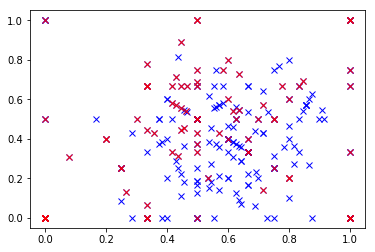

In [35]:
# diagnostics ... plot outcomes of games
nWin = dfAllGames.favoredWin.index.tolist()
nLose = dfAllGames[dfAllGames['favoredWin'] == 0].index.tolist()

plt.plot(dfAllGames.favoredRecord[nWin],dfAllGames.underdogRecord[nWin],'bx')
plt.plot(dfAllGames.favoredRecord[nLose],dfAllGames.underdogRecord[nLose],'rx')

In [36]:
# diagnostics ... logreg variables

# print classifiers
print("classifiers > ",logreg.classes_)

# coefficients
cc = logreg.coef_
cc.shape
print("coeffs")
for ii,ff in enumerate(features):
    print(ii,ff,cc[0][ii])
    

NameError: name 'logreg' is not defined

In [ ]:
# run one year of rolling training, control width of training window w/ trainFreq
import runMadden
reload(runMadden)
reload(madden)

# need to be arrays
trainYears = [2012] #range(2008.2013) 
testYear = [2013]
trainFreq = 6

dd = runMadden.runSeasonRolling(trainYears,testYear,olookups,trainFreq)
dd

In [32]:
# loop over years to test trainFreq
reload(runMadden)
reload(madden)

ddd = None
for y in range(2008,2014):
    trainYears = [y]
    testYear = [y+1]
    trainFreq = 20
    dd = runMadden.runSeasonRolling(trainYears, testYear, reference_data, path_to_lines, trainFreq)
    if ddd is None:
        ddd = dd
    else:
        ddd = ddd.append(dd)
        
ddd        

season 2009, week 1
training data accuracy =  0.7421875
season 2009, week 2
training data accuracy =  0.7421875
season 2009, week 3
training data accuracy =  0.7421875
season 2009, week 4
training data accuracy =  0.7421875
season 2009, week 5
training data accuracy =  0.7421875
season 2009, week 6
training data accuracy =  0.7421875
season 2009, week 7
training data accuracy =  0.7421875
season 2009, week 8
training data accuracy =  0.7421875
season 2009, week 9
training data accuracy =  0.7421875
season 2009, week 10
training data accuracy =  0.7421875
season 2009, week 11
training data accuracy =  0.7421875
season 2009, week 12
training data accuracy =  0.7421875
season 2009, week 13
training data accuracy =  0.7421875
season 2009, week 14
training data accuracy =  0.7421875
season 2009, week 15
training data accuracy =  0.7421875
season 2009, week 16
training data accuracy =  0.7421875
season 2009, week 17
training data accuracy =  0.7421875
season 2010, week 1
training data accura

KeyboardInterrupt: 

In [ ]:
# diagnostics ... plot outcomes of games
nWin = dfAll.favoredWin.index.tolist()
nLose = dfAll[dfAll['favoredWin'] == 0].index.tolist()

plt.plot(dfAll.favoredRecord[nWin],dfAll.underdogRecord[nWin],'bx')
plt.plot(dfAll.favoredRecord[nLose],dfAll.underdogRecord[nLose],'rx')

# pct correct according to spread
print (len(nWin)/ (len(nWin) + len(nLose)))

# pct correct according to model
nWin = dfAll.predictWin.index.tolist()
nLose = dfAll[dfAll['predictWin'] == 0].index.tolist()
print (len(nWin)/ (len(nWin) + len(nLose)))


### loop over multiple years
see how different classifiers or test/train combos perform over the years


In [33]:
import runMadden
import walsh
import madden

path_to_lines = dataRoot + "lines/"

In [43]:
# loop over multiple years

import runMadden
import walsh
reload(madden)
reload(runMadden)


trainStart = 2008
trainLen = 3

mlClassifier = svm.SVC(kernel='poly',probability=True)
dfSVM = runMadden.runSeasonLoop(trainStart, trainLen, mlClassifier, path_to_lines, reference_data)

mlClassifier = linear_model.LogisticRegression(C=1e5)
dfLog = runMadden.runSeasonLoop(trainStart, trainLen, mlClassifier, path_to_lines, reference_data)
#dfLoop = dfSVM


2011 [2008, 2009, 2010]
training data accuracy =  0.70703125
1670 <type 'int'>
2012 [2009, 2010, 2011]
training data accuracy =  0.716145833333
1632 <type 'int'>
2013 [2010, 2011, 2012]
training data accuracy =  0.71484375
1653 <type 'int'>
2014 [2011, 2012, 2013]
training data accuracy =  0.716145833333
1669.0 <type 'numpy.float64'>
2011 [2008, 2009, 2010]
training data accuracy =  0.697916666667
1670 <type 'int'>
2012 [2009, 2010, 2011]
training data accuracy =  0.712239583333
1632 <type 'int'>
2013 [2010, 2011, 2012]
training data accuracy =  0.690104166667
1653 <type 'int'>
2014 [2011, 2012, 2013]
training data accuracy =  0.6953125
1669.0 <type 'numpy.float64'>


In [44]:
dfLog

,lineScore,probaScore1,probaScore2,probaScore3,trainYears,classifierType,classifier
season,,,,,,,
2011,34,49,42,33,[2008 2009 2010],<class 'sklearn.linear_model.logistic.Logistic...,"LogisticRegression(C=100000.0, class_weight=No..."
2012,-14,-2,20,2,[2009 2010 2011],<class 'sklearn.linear_model.logistic.Logistic...,"LogisticRegression(C=100000.0, class_weight=No..."
2013,2,28,40,35,[2010 2011 2012],<class 'sklearn.linear_model.logistic.Logistic...,"LogisticRegression(C=100000.0, class_weight=No..."
2014,0,0,-40,-52,[2011 2012 2013],<class 'sklearn.linear_model.logistic.Logistic...,"LogisticRegression(C=100000.0, class_weight=No..."


In [1]:
dfSVM

NameError: name 'dfSVM' is not defined

In [39]:
trainYears = [2013] 
testYear = [2014]

seasons = np.array(trainYears)
seasonTest = np.array(testYear)

# test new wrapper object
oSeason = walsh.SeasonClassifier(path_to_lines, reference_data)
oSeason.readData(seasons, 'train')
oSeason.readData(seasonTest, 'test')
oSeason.features = features
mlClassifier = linear_model.LogisticRegression(C=1e5)
oSeason.classifier = mlClassifier
oSeason.runClassifier('favoredWin')
oSeason.predict()
oSeason.predictAccuracy('train')
oSeason.rank()
oSeason.predictSummary(week=12, guessCol='probaGuess')

training data accuracy =  0.70703125
('train predict accuracy = ', 0.70703125)


walsh.py:138: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  dfAll['predictTeam'] = np.where((dfAll['predict_proba'] - .5) > 0 , dfAll['favorite'], dfAll['underdog'])


,predictTeam,predict_proba,probaGuess,favorite,Line
8596,Indianapolis Colts,0.923455,16,Indianapolis Colts,14.0
8599,Philadelphia Eagles,0.891147,15,Philadelphia Eagles,11.0
8593,Buffalo Bills,0.797302,14,Buffalo Bills,4.5
8603,San Francisco 49ers,0.795938,13,San Francisco 49ers,8.5
8597,Green Bay Packers,0.778764,12,Green Bay Packers,-9.5
8591,Kansas City Chiefs,0.771934,11,Kansas City Chiefs,-7.0
8602,Denver Broncos,0.767666,10,Denver Broncos,7.0
8598,New England Patriots,0.764685,9,New England Patriots,7.0
8600,San Diego Chargers,0.737630,8,San Diego Chargers,5.0
8601,Seattle Seahawks,0.708936,7,Seattle Seahawks,6.5


In [36]:
oSeason.predictSummary(week=11, guessCol='probaGuess')

,predictTeam,predict_proba,probaGuess,favorite,Line
8587,San Diego Chargers,0.896355,16,San Diego Chargers,10.0
8585,Denver Broncos,0.736736,15,Denver Broncos,-9.5
8577,Miami Dolphins,0.724121,14,Miami Dolphins,5.0
8581,Green Bay Packers,0.696934,13,Green Bay Packers,5.5
8588,Arizona Cardinals,0.675204,12,Arizona Cardinals,2.0
8582,Kansas City Chiefs,0.675102,11,Kansas City Chiefs,1.5
8590,Pittsburgh Steelers,0.671690,10,Pittsburgh Steelers,-5.5
8586,Washington Redskins,0.666699,9,Washington Redskins,7.0
8583,New Orleans Saints,0.651453,8,New Orleans Saints,7.0
8579,Chicago Bears,0.619544,7,Chicago Bears,3.0


In [35]:
oSeason.predictSummary(week=12, guessCol='probaGuess')

,predictTeam,predict_proba,probaGuess,favorite,Line
8596,Indianapolis Colts,0.910224,16,Indianapolis Colts,14.0
8599,Philadelphia Eagles,0.873100,15,Philadelphia Eagles,11.0
8591,Kansas City Chiefs,0.795660,14,Kansas City Chiefs,-7.0
8593,Buffalo Bills,0.767750,13,Buffalo Bills,4.5
8603,San Francisco 49ers,0.766246,12,San Francisco 49ers,8.5
8597,Green Bay Packers,0.747365,11,Green Bay Packers,-9.5
8602,Denver Broncos,0.735228,10,Denver Broncos,7.0
8598,New England Patriots,0.731976,9,New England Patriots,7.0
8600,San Diego Chargers,0.702623,8,San Diego Chargers,5.0
8601,Seattle Seahawks,0.671804,7,Seattle Seahawks,6.5


In [34]:
for i, feature in enumerate(features):
    print("Coeficient {0} = {1}".format(feature, oSeason.classifier.coef_[0, i]))

Coeficient favoredRecord = 1.91252475964
Coeficient underdogRecord = -1.54131295184
Coeficient prevFavoredRecord = 0.0754170412348
Coeficient prevUnderdogRecord = 0.730741963582
Coeficient gameWeek = -0.0126558814763
Coeficient absLine = 0.101668474925
Coeficient divisionGame = 0.248762869133
Coeficient favoredHomeGame = 0.559291599483


In [31]:
oSeason.classifier.coef_?

In [ ]:
reload(madden)
# loop over all train sets and read data

# create a collection of season objects to test various classifiers and parameters
path_to_lines = dataRoot + "lines/"
trainStart = 2012
trainLen = 1
testYear = 0

features = ['favoredRecord','underdogRecord',  # current year records of both teams
            'prevFavoredRecord','prevUnderdogRecord', # prev year records, helps early in season when only few games played
            'gameWeek',  # week in season, should make a good/bad record later in season more important
            'absLine',  # absolute value of spread since favored team already determined
            'divisionGame', # T/F, usually more competitive rivalry games, i.e. bad teams still win home division games.
            'favoredHomeGame', # T/F, important since output of classifier is "did the favored team win?"
            ]

oCollection = walsh.SeasonClassifierCollection()
mlClassifier = svm.SVC(kernel='poly',probability=True)

while testYear < 2014:
    # determine test and train years
    testYear = trainStart + trainLen
    trainYears = range(testYear-trainLen,testYear)


    print (trainYears, testYear)

    # define test and train years
    seasons = np.array(trainYears)
    seasonTest = np.array([testYear]) # should be only one year
    
    #mlClassifier = svm.SVC(kernel='poly',probability=True)
    mlClassifier = linear_model.LogisticRegression(C=1e5)
    classifier_str = str(mlClassifier)[:11]
    description_str = "%s-train-%s-test-%s" % (classifier_str, str(trainYears), str(testYear))
    
    print(description_str)
    
    # create SeasonClassifier object
    oSeason = walsh.SeasonClassifier(path_to_lines, reference_data)
    oSeason.readData(seasons, 'train')
    oSeason.readData(seasonTest, 'test')
    oSeason.features = features

    oSeason.classifier = mlClassifier
    oSeason.runClassifier('favoredWin')
    oSeason.predict()
    oSeason.predictAccuracy('test')
    oSeason.rank()

    oCollection.addSeasonClassifier(oSeason, description_str)
    
    trainStart += 1

In [ ]:
oss = oCollection.collection[description_str]
oss.predictAccuracy('test')

In [ ]:
# copy from one collection to another

reload(madden)
newCollection = madden.SeasonClassifierCollection()

for k,v in oCollection.collection.items():
    print (k,v)
    newCollection.addSeasonClassifier(v,k)
    
    

In [ ]:
oCollection.summary()

In [ ]:
oCollection.listCollection()

In [ ]:
# copy from one collection to another and change classifier and compute

reload(madden)
svm_Collection = madden.SeasonClassifierCollection()

for k,v in oCollection.collection.items():
    mlClassifier = svm.SVC(kernel='poly',probability=True)
    print (k,v)
    
    v.setClassifier(mlClassifier)
    v.runClassifier('favoredWin')
    v.predict()
    v.predictAccuracy('test')
    v.rank()
    newCollection.addSeasonClassifier(v,k)

newCollection.summary()